<a href="https://colab.research.google.com/github/RodrigoMarquesP/Visual_impact_with_wordcloud/blob/master/Wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Wordcloud in python with the wordcloud library***

<img src="https://raw.githubusercontent.com/RodrigoMarquesP/Visual_impact_with_wordcloud/master/files/python_logo_wordcloud.png">

A wordcloud is a picture of the words most related to some subject, being the bigger ones, the most frequent, so, it is a representative way of showing the statistic distribution over a set of words, may it be a book, a speech, a paper, or even social media posts, every piece of text can be compressed into a wordcloud picture.

### **First of all**
We need to install the wordcloud package in our notebook.

"-q" is for a quiet installation.

Then we load the necessary packages.

In [ ]:
!pip install wordcloud -q

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

### **Data loading and processing**

The text extraction is possibly the hardest part of the work, needing to join enough text about the desired subject. For example, the python image from the beginning of the notebook was built with more than 200000 words from the official python documentation.

For the practical example, I choose a short book from H.P. Lovecraft named "The Call of Cthulhu". This text can be found for free on the internet, and then copied to a txt file, so we can start to look at it.

In [48]:
with open("/content/drive/My Drive/Colab Notebooks/arquivos externos/The-Call-of-Cthulhu-1926.txt", "r") as file:
  text = file.read()

print(len(text))

69163


We have so far 69 thousand words, but some of them are split in uppercase and lowercase occurrences, so, to have no word repeats and represent its real number on the book, we convert them all to lowercase.

In [49]:
text = text.lower()
print(text[:200])

the call of cthulhu
the call of cthulhu, by h.p. lovecraft
i. the horror in clay
the most merciful thing in the world, i think, is the inability of the human mind to correlate all its contents. we liv


In any text, we may find very common words that have nothing in common with the theme. Those words need to be removed from the analysis, otherwise, they would be present in any wordcloud, so, we need to load a set of what is called 'stopwords', which will be used later to filter the text. It is a natural language processing common step.

In [ ]:
# generating a standard set of stopwords
stopwords = set(STOPWORDS)
# if we want to add a new stopword, we can just add them to the set
# stopwords.update(list)

Finally, we need to load the background image, otherwise, the wordcloud will be plotted as a rectangle.

There are two options:


*   Load a binary image (black/white) and paint the words using a colormap.
*   Load a colored image and creating a painter object from it.

In the two cases, the image will be used as a mask, but their colors are different. The example bellow uses a colormap, but right next to it is the python logo example to use the colors from the mask image. 


In [ ]:
image_mask = np.array(Image.open("/content/drive/My Drive/Colab Notebooks/arquivos externos/hp.jpg"))

The select image is a binary image of the autor's face.



<img src="https://raw.githubusercontent.com/RodrigoMarquesP/Visual_impact_with_wordcloud/master/files/hp.jpg" height=400>

### **Wordcloud creation**

To properly build the wordcloud we must configure a WordCloud object. Feel free to explore all its parameters functionalities.

Then we create the image passing our text to the generate function of the object.

After all, we can show it and even save it.

Note: The images resolution at the notebook is not so good, but it's pretty great when you save then. Even though, needing a higher resolution, increase the scale parameter.

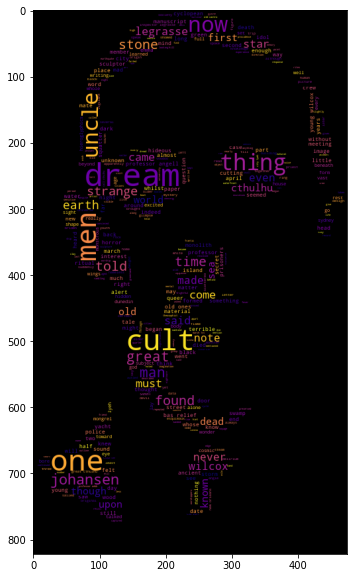

In [ ]:
wc = WordCloud(stopwords=stopwords,
               background_color='black',
               mask=image_mask,
               colormap='plasma',
               max_words=2000)

wc = wc.generate(text)

plt.figure(figsize=(10, 10))
plt.imshow(wc)

# save the file
wc.to_file("lovecraft_wordcloud.png")

209133


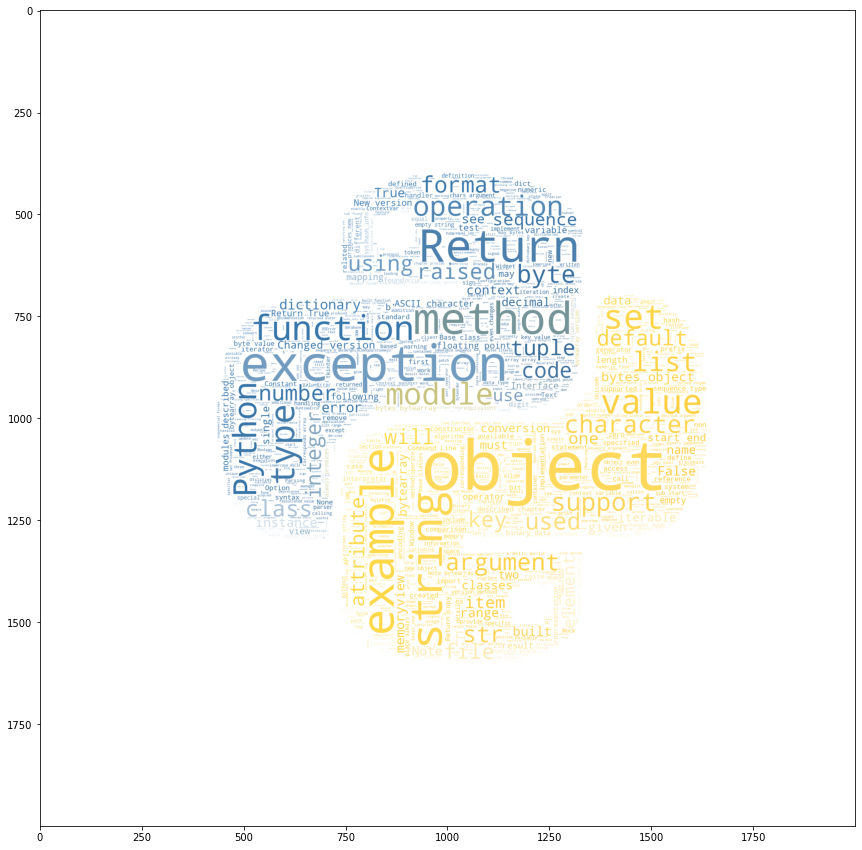

In [43]:
with open("/content/drive/My Drive/Colab Notebooks/arquivos externos/python_docs.txt", "r") as file:
  text = file.read()

print(len(text))
stopwords = set(STOPWORDS)
image_mask = np.array(Image.open("/content/drive/My Drive/Colab Notebooks/arquivos externos/python_logo.jpg"))
image_colors = ImageColorGenerator(image_mask)

wc = WordCloud(stopwords=stopwords,
               background_color='white',
               mask=image_mask,
               color_func=image_colors,
               max_words=200000,
               scale=1)

wc = wc.generate(text)

plt.figure(figsize=(15, 15))
plt.imshow(wc)
wc.to_file("python_logo_wordcloud.png")